<a href="https://colab.research.google.com/github/JakeLee92/Reinforcement/blob/master/dnn_mnist_classification_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [ ]:
train_labels[0]

5

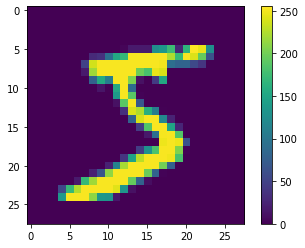

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
train_labels[0]

5

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_labels.shape

(60000, 10)

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(units=512,
                       activation='relu',
                       input_shape=(28*28,)))
model.add(layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels,
                    epochs=30,
                    batch_size=100,
                    validation_split=0.2)

Epoch 1/30
480/480 [==============================] - 4s 8ms/step - loss: 5.3383 - accuracy: 0.8936 - val_loss: 1.1000 - val_accuracy: 0.9339
Epoch 2/30
480/480 [==============================] - 4s 8ms/step - loss: 0.7994 - accuracy: 0.9500 - val_loss: 0.9099 - val_accuracy: 0.9507
Epoch 3/30
480/480 [==============================] - 4s 8ms/step - loss: 0.5842 - accuracy: 0.9617 - val_loss: 0.8562 - val_accuracy: 0.9565
Epoch 4/30
480/480 [==============================] - 4s 8ms/step - loss: 0.4390 - accuracy: 0.9710 - val_loss: 0.8612 - val_accuracy: 0.9551
Epoch 5/30
480/480 [==============================] - 4s 8ms/step - loss: 0.3711 - accuracy: 0.9759 - val_loss: 0.9876 - val_accuracy: 0.9619
Epoch 6/30
480/480 [==============================] - 4s 8ms/step - loss: 0.3860 - accuracy: 0.9783 - val_loss: 1.0662 - val_accuracy: 0.9614
Epoch 7/30
480/480 [==============================] - 4s 8ms/step - loss: 0.3305 - accuracy: 0.9810 - val_loss: 1.0775 - val_accuracy: 0.9607
Epoch 

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

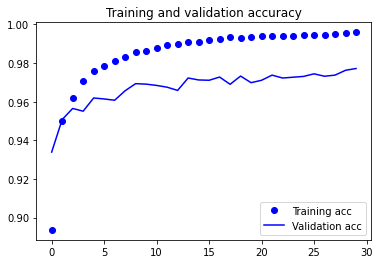

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

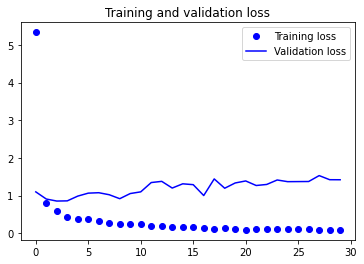

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.2327 - accuracy: 0.9778


In [ ]:
import numpy as np

In [ ]:
predict = model.predict(test_images[0].reshape((1, 28 * 28)))

print('predict probability:', predict)
print('predict number:', np.argmax(predict))

predict probability: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
predict number: 7


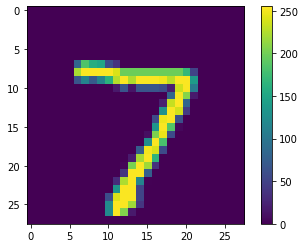

In [ ]:
plt.figure()
plt.imshow(test_images[0].reshape(28, 28))
plt.colorbar()
plt.grid(False)
plt.show()